In the competitive arena of sports, every move and every point is a data point waiting to be explored. This project, Spike into Data, brings the excitement of the volleyball court to the analytical world, transforming raw match statistics into actionable insights. Drawing inspiration from the Canyon Eagles Varsity Volleyball team and utilizing their 2024-2025 season data, this project explores how machine learning can revolutionize sports analysis by predicting match outcomes based on historical game data.

The dataset used in this project, derived from MaxPreps for the 2024-2025 season, captures a snapshot of the team's performance. Although the current dataset is limited, additional data from previous seasons is being incorporated to enrich the analysis. To avoid overfitting during model development, cross-validation techniques have been employed to ensure the models generalize well to unseen data. This approach balances the excitement of analytics with the rigor of machine learning best practices.

Key Features of the Dataset:
Source: The data was sourced from MaxPreps, a trusted platform for high school sports statistics.

Scope: Currently, the dataset represents the 2024-2025 season, but ongoing efforts are focused on including data from previous years to provide a richer historical context.

Structure: The provided .csv file contains match scores and outcomes that form the backbone for this analysis. It serves as the foundation for developing predictive models and conducting statistical analyses.

Project Highlights:

Data Visualization: Visual interpretations of the Canyon Eagles' match performances, trends, and player contributions.

Predictive Modeling: Machine learning models are employed to predict match outcomes based on historical data, offering insights into key factors that drive success.

Cross-Validation: Techniques such as k-fold cross-validation are implemented to avoid overfitting and ensure robust model performance.

Growth Through Data: By integrating data from past seasons, the project continuously evolves, aligning with the team's spirit of perseverance and improvement.

Spike into Data is more than a technical exercise—it is a tribute to teamwork, precision, and learning, values shared by the Canyon Eagles and the data science community. This project demonstrates how technology and sports intersect, offering a glimpse into the future of performance analysis. Beyond the numbers, it underscores a dedication to improvement and a passion for innovation, making it a compelling addition to your portfolio, especially for honors admission.

The dataset contains volleyball statistics from 41 matches, organized into 32 columns. Here's a summary of the features:

    Year: The year of the match (int).
    Date: The date of the match (datetime).
    Outcome: Match outcome, either "W" (win) or "L" (loss) (object).
    Home score: The team's score (int).
    Opponent Score: The opponent's score (int).
    Opponent: Name of the opposing team (object).
    Kills: Total number of kills (int).
    Kill %: Kill percentage (float).
    Attempts: Total attack attempts (int).
    Hitting Efficiency: Efficiency of hitting (float).
    Aces: Total number of service aces (int).
    Aces/Set: Average aces per set (float).
    Ace %: Service ace percentage (float).
    Serve Attempts: Total service attempts (int).
    Serve Errors: Total service errors (int).
    Serving Efficiency (%): Serving efficiency as a percentage (float).
    Points Scored: Total points scored (int).
    Solo Blocks: Total solo blocks (int).
    Assist Blocks: Total assist blocks (int).
    Total Blocks: Total blocks (int).
    Blocks per Set: Average blocks per set (float).
    Block Errors: Total block errors (int).
    Solo Digs: Total solo digs (int).
    Assist Digs: Total assist digs (int).
    Total Digs: Total digs (int).
    Digs per Set: Average digs per set (float).
    Dig Errors: Total dig errors (int).
    Assists: Total assists (int).
    Assists per Set: Average assists per set (float).
    Ball Handling Errors (BHE): Total ball handling errors (int).
    Receives: Total receives (int).
    Receives per Set: Average receives per set (float).

In [1]:
pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [4]:
# Upload the file
uploaded = files.upload()  # This will allow you to upload a file interactively

# Load the uploaded file
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")
    df = pd.read_csv(file_name)
    print(df.head())  # Display the first few rows of the dataset

Saving Volleyball_Stas.csv to Volleyball_Stas.csv
Uploaded file: Volleyball_Stas.csv
   Year    Date Outcome  Home score  Opponent Score  \
0  2024  13-Aug       L           1               3   
1  2024  15-Aug       W           2               1   
2  2024  15-Aug       W           2               0   
3  2024  15-Aug       W           2               0   
4  2024  16-Aug       W           2               1   

                        Opponent  Kills  Kill %  Attempts  Hitting Efficiency  \
0                  Bushland (TX)     37     9.3       149               0.081   
1                           MLHS     40    20.0        42               0.000   
2  Timber Creek (Fort Worth, TX)     30    10.0       106               0.170   
3                Whitehouse (TX)     27    13.5        70               0.257   
4                  Hereford (TX)     37    12.3       126               0.183   

   ...  Solo Digs  Assist Digs  Total Digs  Digs per Set  Dig Errors  Assists  \
0  ...          

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
   Year    Date Outcome  Home score  Opponent Score  \
0  2024  13-Aug       L           1               3   
1  2024  15-Aug       W           2               1   
2  2024  15-Aug       W           2               0   
3  2024  15-Aug       W           2               0   
4  2024  16-Aug       W           2               1   

                        Opponent  Kills  Kill %  Attempts  Hitting Efficiency  \
0                  Bushland (TX)     37     9.3       149               0.081   
1                           MLHS     40    20.0        42               0.000   
2  Timber Creek (Fort Worth, TX)     30    10.0       106               0.170   
3                Whitehouse (TX)     27    13.5        70               0.257   
4                  Hereford (TX)     37    12.3       126               0.183   

   ...  Solo Digs  Assist Digs  Total Digs  Digs per Set  Dig Errors  Assists  \
0  ...          3           11           9           2.1          19  

In [6]:
# Display column names and their data types
print("\nColumn names and data types:")
print(df.dtypes)




Column names and data types:
Year                            int64
Date                           object
Outcome                        object
Home score                      int64
Opponent Score                  int64
Opponent                       object
Kills                           int64
Kill %                        float64
Attempts                        int64
Hitting Efficiency            float64
Aces                            int64
Aces/Set                      float64
Ace %                         float64
Serve Attempts                  int64
Serve Errors                    int64
Serving Efficiency (%)        float64
Points Scored                   int64
Solo Blocks                     int64
Assist Blocks                   int64
Total Blocks                    int64
Blocks per Set                float64
Block Errors                    int64
Solo Digs                       int64
Assist Digs                     int64
Total Digs                      int64
Digs per Set        

In [7]:
# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())




Summary statistics for numeric columns:
         Year  Home score  Opponent Score      Kills     Kill %    Attempts  \
count    41.0   41.000000       41.000000  41.000000  41.000000   41.000000   
mean   2024.0    2.000000        1.146341  32.024390  10.358537  100.658537   
std       0.0    1.140175        1.130508  10.213931   2.632772   36.688288   
min    2024.0    0.000000        0.000000  14.000000   6.600000   42.000000   
25%    2024.0    1.000000        0.000000  25.000000   8.500000   76.000000   
50%    2024.0    2.000000        1.000000  33.000000  10.300000   94.000000   
75%    2024.0    3.000000        2.000000  38.000000  11.000000  126.000000   
max    2024.0    3.000000        3.000000  55.000000  20.000000  190.000000   

       Hitting Efficiency       Aces   Aces/Set      Ace %  ...  Solo Digs  \
count           41.000000  41.000000  41.000000  41.000000  ...  41.000000   
mean             0.125195   6.073171   1.919512   6.002439  ...   3.829268   
std          

In [8]:
# Count of missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
Year                          0
Date                          0
Outcome                       0
Home score                    0
Opponent Score                0
Opponent                      0
Kills                         0
Kill %                        0
Attempts                      0
Hitting Efficiency            0
Aces                          0
Aces/Set                      0
Ace %                         0
Serve Attempts                0
Serve Errors                  0
Serving Efficiency (%)        0
Points Scored                 0
Solo Blocks                   0
Assist Blocks                 0
Total Blocks                  0
Blocks per Set                0
Block Errors                  0
Solo Digs                     0
Assist Digs                   0
Total Digs                    0
Digs per Set                  0
Dig Errors                    0
Assists                       0
Assists per Set               0
Ball Handling Errors (BHE)    0
Receives

In [9]:
# Unique values in each column
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")




Unique values in each column:
Year: 1 unique values
Date: 30 unique values
Outcome: 2 unique values
Home score: 4 unique values
Opponent Score: 4 unique values
Opponent: 30 unique values
Kills: 27 unique values
Kill %: 25 unique values
Attempts: 36 unique values
Hitting Efficiency: 30 unique values
Aces: 14 unique values
Aces/Set: 20 unique values
Ace %: 24 unique values
Serve Attempts: 20 unique values
Serve Errors: 12 unique values
Serving Efficiency (%): 25 unique values
Points Scored: 20 unique values
Solo Blocks: 11 unique values
Assist Blocks: 12 unique values
Total Blocks: 14 unique values
Blocks per Set: 22 unique values
Block Errors: 15 unique values
Solo Digs: 11 unique values
Assist Digs: 12 unique values
Total Digs: 14 unique values
Digs per Set: 22 unique values
Dig Errors: 15 unique values
Assists: 25 unique values
Assists per Set: 24 unique values
Ball Handling Errors (BHE): 5 unique values
Receives: 33 unique values
Receives per Set: 33 unique values


In [10]:
# Basic info about the dataset
print("\nBasic info about the dataset:")
print(df.info())



Basic info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        41 non-null     int64  
 1   Date                        41 non-null     object 
 2   Outcome                     41 non-null     object 
 3   Home score                  41 non-null     int64  
 4   Opponent Score              41 non-null     int64  
 5   Opponent                    41 non-null     object 
 6   Kills                       41 non-null     int64  
 7   Kill %                      41 non-null     float64
 8   Attempts                    41 non-null     int64  
 9   Hitting Efficiency          41 non-null     float64
 10  Aces                        41 non-null     int64  
 11  Aces/Set                    41 non-null     float64
 12  Ace %                       41 non-null     float64
 13  Serve 

In [11]:

# Check for any duplicated rows
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())


Number of duplicated rows:
0


In [12]:
#  Data Preprocessing
# Encode the 'Outcome' column as binary labels (Win = 1, Loss = 0)
df['Outcome'] = df['Outcome'].map({'W': 1, 'L': 0})

In [13]:
# Select features and target variable
X = df.drop(['Outcome', 'Date', 'Opponent'], axis=1)  # Drop non-numeric and target columns
y = df['Outcome']


In [14]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-16-b0b2e370bea0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Outcome'], palette='coolwarm')


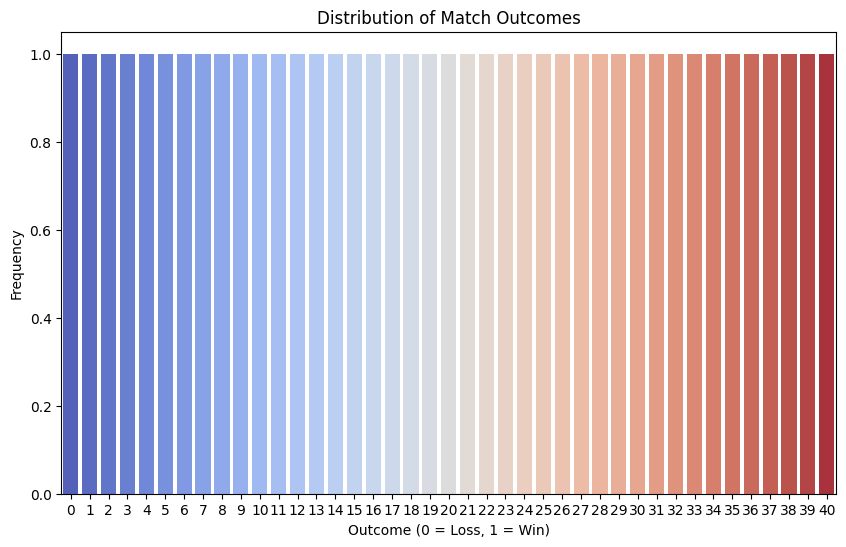

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Outcome'], palette='coolwarm')
plt.title("Distribution of Match Outcomes")
plt.xlabel("Outcome (0 = Loss, 1 = Win)")
plt.ylabel("Frequency")
plt.show()

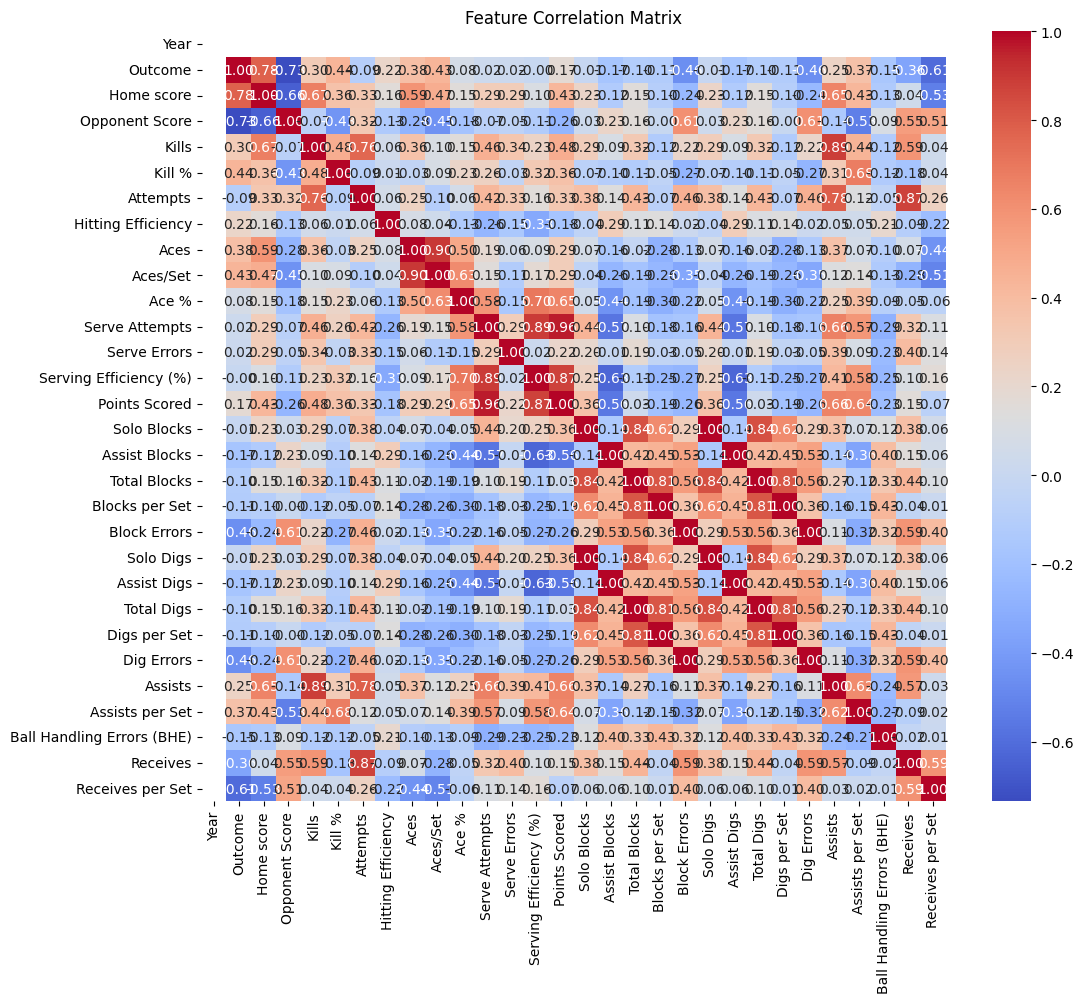

In [17]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
#  Model Training and Evaluation
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

In [20]:
# Cross-Validation and Test Evaluation
cv_results = {}
test_results = {}

# Use stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    cv_results[name] = cv_scores.mean() * 100  # Store mean cross-validation accuracy

    # Train and evaluate on test data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) * 100
    test_results[name] = test_accuracy

In [21]:
# Regularization (Hyperparameter Tuning)
tuned_results = {}
for name, model in models.items():
    if name == "Random Forest":
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }
    elif name == "Gradient Boosting":
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    elif name == "Support Vector Machine":
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    elif name == "Logistic Regression":
        param_grid = {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    else:
        continue
         # GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=skf, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    tuned_results[name] = grid_search.best_score_ * 100

# Combine Results
results_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Cross-Validation Accuracy (%)": list(cv_results.values()),
    "Test Accuracy (%)": list(test_results.values()),
    "Tuned Accuracy (%)": list(tuned_results.values())
})

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


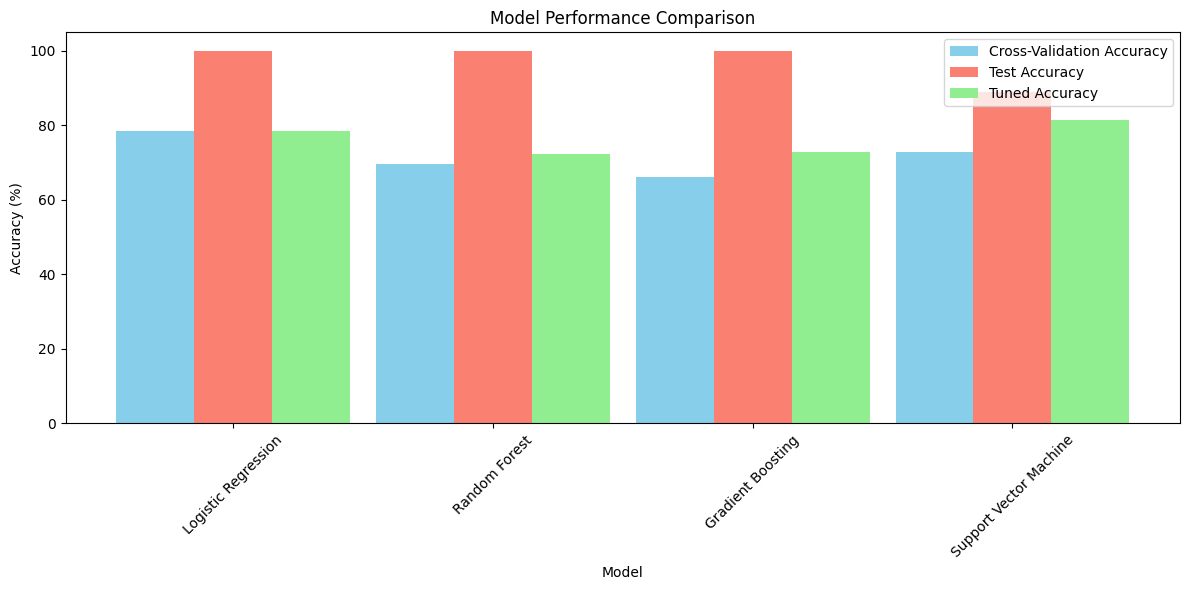

In [22]:
# Visualization of Results
plt.figure(figsize=(12, 6))
bar_width = 0.3
x = np.arange(len(models))
plt.bar(x - bar_width, results_df['Cross-Validation Accuracy (%)'], bar_width, label='Cross-Validation Accuracy', color='skyblue')
plt.bar(x, results_df['Test Accuracy (%)'], bar_width, label='Test Accuracy', color='salmon')
plt.bar(x + bar_width, results_df['Tuned Accuracy (%)'], bar_width, label='Tuned Accuracy', color='lightgreen')
plt.xticks(x, results_df['Model'], rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Print Results
print("\nModel Evaluation Results:")
print(results_df)

# Save results to a CSV file
results_df.to_csv("model_evaluation_results_with_tuning.csv", index=False)


Model Evaluation Results:
                    Model  Cross-Validation Accuracy (%)  Test Accuracy (%)  \
0     Logistic Regression                      78.571429         100.000000   
1           Random Forest                      69.523810         100.000000   
2       Gradient Boosting                      66.190476         100.000000   
3  Support Vector Machine                      72.857143          88.888889   

   Tuned Accuracy (%)  
0           78.571429  
1           72.380952  
2           72.857143  
3           81.428571  


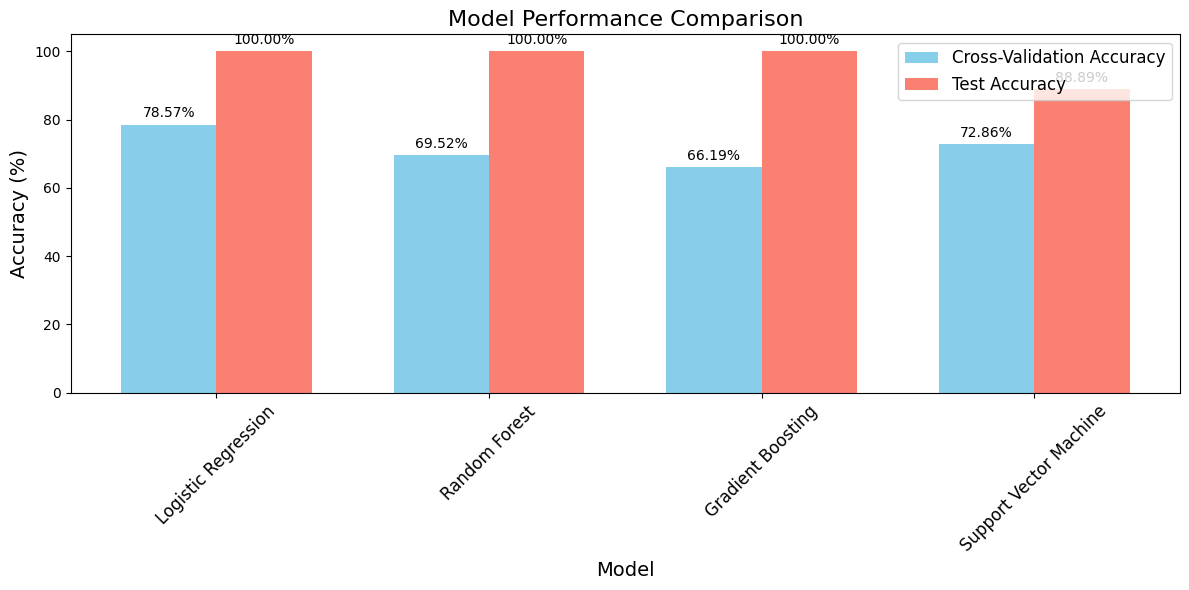

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Visualization of Model Performance
models = results_df['Model']
cv_accuracies = results_df['Cross-Validation Accuracy (%)']
test_accuracies = results_df['Test Accuracy (%)']

# Set up bar positions
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, cv_accuracies, width, label='Cross-Validation Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Model Performance Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, fontsize=12)
ax.legend(fontsize=12)

# Display values on top of bars
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',  # Format the value
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_bar_labels(bars1)
add_bar_labels(bars2)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


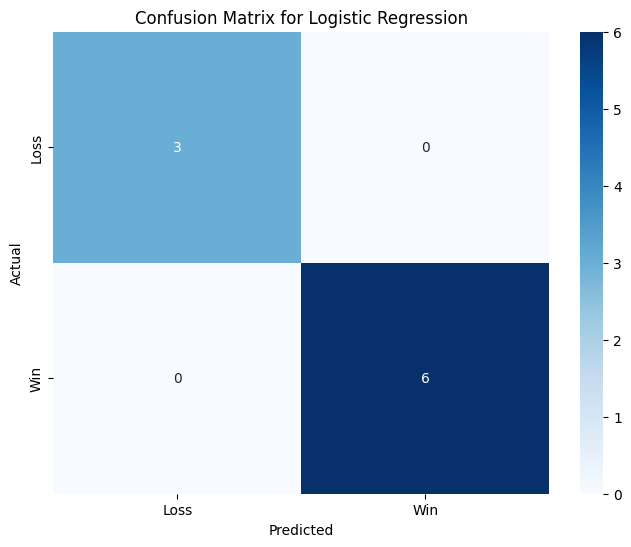

In [28]:
# Confusion Matrix

best_model = LogisticRegression()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Ensure training_columns matches the features used during training
training_columns = df.drop(['Outcome', 'Date', 'Opponent'], axis=1).columns

# Example new data (replace these values with actual match statistics)
new_data = pd.DataFrame([{
    'Home score': 2,
    'Opponent Score': 1,
    'Kills': 35,
    'Kill %': 10.5,
    'Attempts': 120,
    'Hitting Efficiency': 0.15,
    'Aces': 7,
    'Solo Blocks': 3,
    'Block Assists': 2,
    'Total Blocks': 5,
    'Block Errors': 1,
    'Solo Digs': 4,
    'Assist Digs': 3,
    'Total Digs': 10,
    'Digs per Set': 2.0,
    'Dig Errors': 1,
    'Assists': 25,
    'Assists per Set': 12.5,
    'Ball Handling Errors (BHE)': 1,
    'Receives': 60,
    'Receives per Set': 20
}])

# Add missing columns with NaN values for consistency with training features
for col in training_columns:
    if col not in new_data.columns:
        new_data[col] = np.nan

# Ensure the new data columns are in the same order as training columns
new_data = new_data[training_columns]

# Impute missing values (assigning mean of training data or 0 for unobserved features)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # Impute the original training data
new_data_imputed = imputer.transform(new_data)  # Apply imputation to new data

# Scale the new data
scaler = StandardScaler()
scaler.fit(X_imputed)  # Fit scaler on imputed training data
new_data_scaled = scaler.transform(new_data_imputed)

# Predict outcomes using the best model
predictions = best_model.predict(new_data_scaled)

# Map predictions to readable labels
prediction_mapping = {1: 'Win', 0: 'Loss'}
predicted_outcome = [prediction_mapping[pred] for pred in predictions]

# Output the predictions
print("Predicted Outcomes for New Data:")
print(predicted_outcome)


Predicted Outcomes for New Data:
['Win']


In [32]:
# The function suggest_metrics analyzes past volleyball games to recommend key metrics for the Canyon Eagles to focus on to improve their chances of winning against a specified opponent.

def suggest_metrics(df, features, opponent_name):
    """
    Suggests top metrics to improve for Canyon Eagles to win against a specific team.
    """
    # Filter games against the given opponent
    games_against_opponent = df[df['Opponent'] == opponent_name]
    if games_against_opponent.empty:
        return f"No games found against '{opponent_name}'. Please check the input."

    # Separate winning and losing games
    winning_games = games_against_opponent[games_against_opponent['Outcome'] == 1]
    losing_games = games_against_opponent[games_against_opponent['Outcome'] == 0]

    if winning_games.empty and losing_games.empty:
        return f"No sufficient data found for games against '{opponent_name}'."

    if winning_games.empty:
        # If no winning games, compare losing metrics to overall winning metrics
        overall_winning_avg = df[df['Outcome'] == 1][features].mean()
        avg_loss_metrics = losing_games[features].mean()
        improvements = overall_winning_avg - avg_loss_metrics
    else:
        # Compare metrics for winning and losing games against the opponent
        avg_win_metrics = winning_games[features].mean()
        avg_loss_metrics = losing_games[features].mean()
        improvements = avg_win_metrics - avg_loss_metrics

    # Drop metrics with NaN improvements
    improvements = improvements.dropna()
    if improvements.empty:
        return f"Not enough valid metrics available to suggest improvements for '{opponent_name}'."

    # Sort metrics by suggested improvement
    top_metrics = improvements.sort_values(ascending=False).head(6)

    # Generate the output message
    result = f"\nCanyon Eagles to win against '{opponent_name}' in future games:\n"
    result += "These are the top 6 metrics to achieve:\n"
    for i, (metric, improvement) in enumerate(top_metrics.items(), start=1):
        result += f"{i}. {metric}: Increase by {improvement:.2f}\n"

    return result

# Example Usage
# Define features used for training
features = df.drop(['Outcome', 'Date', 'Opponent'], axis=1).columns

# Prompt the user to input the opponent's name
opponent_name = input("Enter the opponent team's name: ")

# Call the function and print the results
result = suggest_metrics(df, features, opponent_name)
print(result)


Enter the opponent team's name: Randall (Amarillo, TX)

Canyon Eagles to win against 'Randall (Amarillo, TX)' in future games:
These are the top 6 metrics to achieve:
1. Points Scored: Increase by 14.50
2. Assists: Increase by 7.50
3. Serving Efficiency (%): Increase by 7.25
4. Kills: Increase by 6.50
5. Ace %: Increase by 5.35
6. Aces: Increase by 4.00



In [33]:
# Print all unique opponent names
print("Available Opponent Teams:")
print(df['Opponent'].unique())

Available Opponent Teams:
['Bushland (TX)' 'MLHS' 'Timber Creek (Fort Worth, TX)' 'Whitehouse (TX)'
 'Hereford (TX)' 'Mansfield (TX)' 'Arlington (TX)' 'Midlothian (TX)'
 'Tascosa (Amarillo, TX)' 'NVTO' 'Brennan (San Antonio, TX)'
 'Eastlake (El Paso, TX)' 'Joshua (TX)' 'All Saints (Fort Worth, TX)'
 'Trinity (Midland, TX)' 'Amarillo (TX)' 'Midland Legacy (Midland, TX)'
 'SACHS' 'Wylie (Abilene, TX)' 'Liberty (Lubbock, TX)' 'MCHS' 'Pampa (TX)'
 'Perryton (TX)' 'Randall (Amarillo, TX)' 'Dumas (TX)' 'Borger (TX)'
 'West Plains (Amarillo, TX)' 'Monahans (TX)' 'Fabens (TX)' 'EMHS']
